In [1]:
import numpy as np
from sympy import * 
import sympy as sym
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import math
import pandas as pd
from scipy.optimize import curve_fit





#Statistik wie die Großen


#Arithmetischer Mittelwert

def mittelwert(Messreihe):
    return sum(Messreihe)/len(Messreihe)


#Empirische Varianz

def empVar(Messreihe):
    if len(Messreihe) < 2:
        return 'Die Messreihe muss mindestens zwei Messwerte beinhalten'
    empvar = 0
    mw = mittelwert(Messreihe)
    indexarray = np.arange(0,len(Messreihe))
    for index in indexarray:
        empvar += (Messreihe[index] - mw)**2
    return (1/(len(Messreihe)-1))*empvar


#Empirische Standardabweichung

def empStan(Messreihe):
    return empVar(Messreihe)**(1/2)


#Standardabweichung des Mittelwerts

def Stanmi(Messreihe):
    return empStan(Messreihe)/(len(Messreihe)**(1/2))


#Standardabweichung der empirischen Standardabweichung:

def StanempStan(Messreihe):
    return empStan(Messreihe)/((2*(len(Messreihe)-1))**(1/2))



#Gauß-Fehlerfortpflanzung
# Definiere die Symbole, Parameter, die Funktion, die Unsicherheiten und die Bestwerte:

#x, y = symbols('? ? ')
#params = [?,?]
#Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
#Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
#exp = ? 

def fehlerfort(exp, params, Bestwerte, Unsicherheiten):
    delexp = 0
    for i in np.arange(0, len(params)):
        delexp += (sym.lambdify(params, sym.diff(exp,params[i]), modules=['math'])(*Bestwerte)*Unsicherheiten[i])**2
    return delexp**(1/2)

# Korrelierte Fehlerfortpflanzung

def korfehlerfort(exp, params, Bestwerte, Unsicherheiten, Eingang):
    #x, y = symbols('? ? ')
    #Eingang= [?,?,?]  #Liste von allen Arrays mit allen Werten der Parameter um Korrelationskoeffizienten zu bestimmen
    #params = [?,?]
    #Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
    #Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
    #exp = ? 
    A = []
    for i in np.arange(len(params)):
        A.append(sym.lambdify(params, sym.diff(exp,params[i]), modules=['math'])(*Bestwerte))
    return np.sqrt(abs((np.dot(A,np.dot(kovmatrix(Eingang,Unsicherheiten),A)))))
        
        

#x, y = symbols('? ? ')
# Eingang= [?,?,?]  #Liste von allen Arrays mit allen Werten der Parameter um Korrelationskoeffizienten zu bestimmen
#params = [?,?]
#Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
#Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
#exp = ? 

# Kovarianzmatrix V:
def kovmatrix(Eingang, Unsicherheiten):
    if len(Eingang)!= len(Unsicherheiten):
        return 'Eingangsvariablen und Fehler stimmen nicht überein'
    V = []
    for i in np.arange(len(Eingang)):
        for n in np.arange(len(Eingang)):
            if i == n:
                V.append(Unsicherheiten[i]**2)
            else:
                V.append(empKor(Eingang[i], Eingang[n]))
    return np.reshape(V, (len(Eingang), len(Eingang)))
                
        
#Empirische Korrelation

def empKor(x,y):
    if len(x)!=len(y):
        return 'Datensätze müssen gleich lang sein'
    else:
        a = []
        for i in np.arange(len(x)):
            a.append((x[i]-mittelwert(x))*(y[i]-mittelwert(y)))
        return (1/(len(x)-1))*sum(a)
    

#Korrelationskoeffzienten

def korkoef(x,y):
    return empKor(x,y)/(empStan(x)*empStan(y))


# Einfacher t-test

def ttest(x, y, delta_x):
    return abs(x-y)/delta_x
    
    
# t-test mit zwei Ergebnissen

def ttest2(x, y, delta_x , delta_y):
    return abs(x-y)/(np.sqrt(delta_x**2+delta_y**2))

In [3]:
dist = np.arange(0,25,1)
b = np.array([381,424,440,448,453,455,457,459,459,451,453,456,456,457,458,458,458,458,457,457,458,451,451,447,427])
print(dist)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


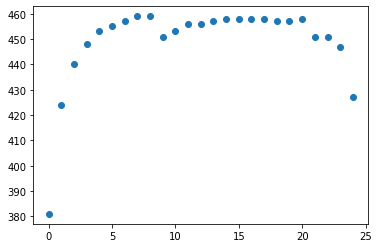

In [5]:
plt.scatter(dist,b)